# Exploratory Data Analysis on Autism in Adults

In this notebook, I will be exploring the prevalency of autism in adults using the Autism Screening in Adults dataset on Kaggle. This dataset can be found here: https://www.kaggle.com/datasets/andrewmvd/autism-screening-on-adults

Information about this dataset:
> "This dataset is composed of survey results for more than 700 people who filled an app form (via www.asdtests.com). There are labels portraying whether the person received a diagnosis of autism, allowing machine learning models to predict the likelihood of having autism, therefore allowing healthcare professionals prioritize their resources."

The following data points are included in this dataset:
- A1 Score: Score of answer 1.
- A2 Score: Score of answer 2.
- A3 Score: Score of answer 3.
- A4 Score: Score of answer 4.
- A5 Score: Score of answer 5.
- A6 Score: Score of answer 6.
- A7 Score: Score of answer 7.
- A8 Score: Score of answer 8.
- A9 Score: Score of answer 9.
- A10 Score: Score of answer 10.
>Each of the above variables receive either a 1 or a 0 in scoring.

- Age: Age of participant.
- Gender: Gender of participant.
- Ethnicity: Ethnicity of participant.
- Jundice: Describes if the participant has jundice or not. 
- Autism: Describes if the participant was diagnosed with autism or not prior to taking the quiz.
- Country of Residence: The participant's country of residence.
- Used App Before: Describes if the participant has used the app before.
- Result: Sum of all of the scores from the questions above.
- Age Description: Describes the participant's age in string format.
- Relation: Describes if the participant or someone else answered the questions for the participant.
- Class/ASD: Describes if the app diagnosed the participant with autism or not.

## Citations
- Tabtah, F. (2017). Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment. Proceedings of the 1st International Conference on Medical and Health Informatics 2017, pp.1-6. Taichung City, Taiwan, ACM.
- Thabtah, F. (2017). Machine Learning in Autistic Spectrum Disorder Behavioural Research: A Review. To Appear in Informatics for Health and Social Care Journal. December, 2017

# Autism in Adults Factors to be Explored
1. How many people were not diagnosed as autistic via the app, but were diagnosed as autistic before?
2. How many women were and weren't diagnosed compared to men?
3. How many BIPOC (black, indigenous, people of color) were and weren't diagnosed compared to other ethnicities?
4. How many people aged 45 and over were able to secure a diagnosis?

## Reading in the Data and Preliminary Exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

sns.set(style='whitegrid')

In [3]:
# Loading the data
df = pd.read_csv("autism_screening.csv")

In [4]:
# Get description of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [5]:
# Find the amount of nulls within the dataframe.
df.isna().sum()

In [6]:
# Replace "?" with "unknown"
df = df.replace(to_replace="?",
           value="unknown")

In [7]:
# Replace NaNs with "unknown"
df = df.replace(to_replace=np.nan,
           value="unknown")

In [8]:
df['age'] = df['age'].replace(to_replace="unknown",
           value=0)
df['result'] = df['result'].astype('int')
df['age'] = df['age'].astype('int')

In [9]:
# Find the amount of nulls within the dataframe.
df.isna().sum()

In [10]:
# First 10 rows in the dataframe.
df.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,unknown,no,no,Egypt,no,2,18 and more,unknown,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,United States,no,9,18 and more,Self,YES
6,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,United States,no,2,18 and more,Self,NO
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,New Zealand,no,5,18 and more,Parent,NO
8,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,United States,no,6,18 and more,Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,18 and more,Health care professional,YES


In [11]:
# What score result typically gets a diagnosis of autism by the app?
# Does this score match up with prior autism diagnoses?
# Filter dataframe to only include CLASS/ASD = "YES"
yes_app_df = df[df['Class/ASD'] == 'YES']
yes_app_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,United States,no,9,18 and more,Self,YES
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,18 and more,Health care professional,YES
10,1,1,1,1,1,1,1,1,1,1,...,m,White-European,no,no,United States,no,10,18 and more,Relative,YES
31,1,0,0,1,1,1,1,1,0,1,...,f,White-European,no,yes,United States,no,7,18 and more,Self,YES


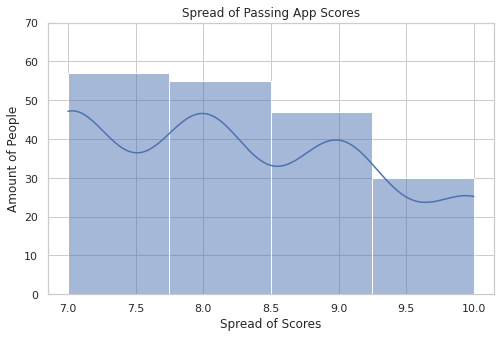

In [12]:
# Show the spread of scores
fig,ax = plt.subplots(figsize=(8,5))
sns.histplot(x="result",
             data=yes_app_df,
             kde=True,
             bins=4)
plt.title("Spread of Passing App Scores")
plt.ylabel("Amount of People")
plt.xlabel("Spread of Scores")
plt.ylim(0, 70)
plt.show()

[]

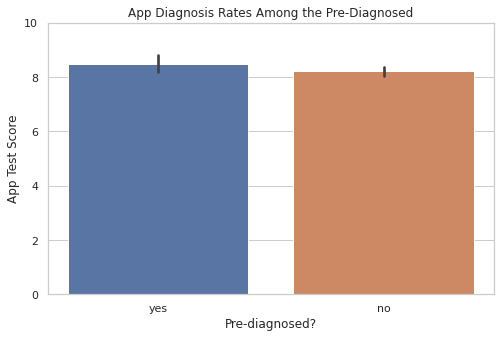

In [13]:
# Show passing app scores compared to pre-diagnosis
fix, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='austim',
            y='result',
            data=yes_app_df)
plt.ylim(0, 10)
plt.title("App Diagnosis Rates Among the Pre-Diagnosed")
plt.ylabel("App Test Score")
plt.xlabel("Pre-diagnosed?")
plt.plot()

## How many people were not diagnosed as autistic via the app, but were diagnosed as autistic before?

In [14]:
# A dataframe where autism = yes and Class/ASD = NO

prior_asd_df = df[(df['austim'] == "yes")]
prior_asd_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,18 and more,Health care professional,YES
15,1,1,0,1,1,0,0,1,0,1,...,m,Middle Eastern,no,yes,New Zealand,no,6,18 and more,Parent,NO


In [15]:
# How many data points are in this new set?
len(prior_asd_df)

91

In [16]:
# Count the amount of yesses under the Class/ASD column
prior_asd_df[prior_asd_df['Class/ASD'] == 'YES'].count() #43

# Count the amount of nos under the Class/ASD column
prior_asd_df[prior_asd_df['Class/ASD'] == 'NO'].count() #48

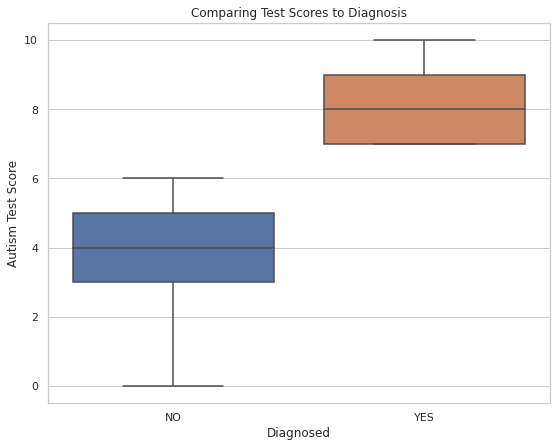

In [17]:
# Compare test scores to if the app diagnosed a particpant with autism or not.
fig, ax = plt.subplots(figsize=(9, 7))
sns.boxplot(x='Class/ASD',
            y='result',
            data=df)
plt.xlabel('Diagnosed')
plt.ylabel('Autism Test Score')
plt.title('Comparing Test Scores to Diagnosis')
plt.show()

In [18]:
# Change YES and NO from the Class/ASD column to bool values.
# YES = True
# NO = False
bool_prior_autism = prior_asd_df.copy()
bool_prior_autism['Class/ASD'] = prior_asd_df['Class/ASD'].map({'YES': True,
                                                   'NO': False})
bool_prior_autism.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,False
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,True
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,False
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,18 and more,Health care professional,True
15,1,1,0,1,1,0,0,1,0,1,...,m,Middle Eastern,no,yes,New Zealand,no,6,18 and more,Parent,False


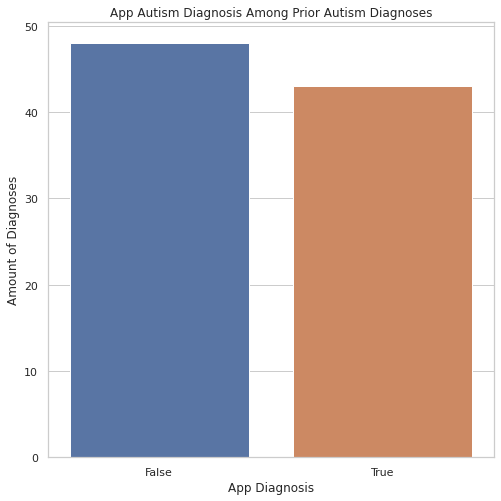

In [19]:
# Plot showing the amount of people diagnosed with autism outside of the 
    # app and if the app diagnosed them with autism as well (or not).

fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x='Class/ASD',
            data=bool_prior_autism)
plt.xlabel("App Diagnosis")
plt.ylabel("Amount of Diagnoses")
plt.title("App Autism Diagnosis Among Prior Autism Diagnoses")
plt.show()

### Summary
- Among those already diagnosed with autism, the app may make a misdiagnosis.
- In order to be diagnosed with autism, a participant must obtain a score between 7 and 10.

## How many women were and weren't diagnosed compared to men?

In [20]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,unknown,no,no,Egypt,no,2,18 and more,unknown,NO


In [21]:
# Create two dataframes from the original dataframe. One with those diagnosed
    # via the app and another with those not diagnosed via the app.

app_diag_yes = df[df['Class/ASD'] == 'YES']
app_diag_no = df[df['Class/ASD'] == 'NO']

app_diag_yes.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,United States,no,9,18 and more,Self,YES
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,18 and more,Health care professional,YES
10,1,1,1,1,1,1,1,1,1,1,...,m,White-European,no,no,United States,no,10,18 and more,Relative,YES
31,1,0,0,1,1,1,1,1,0,1,...,f,White-European,no,yes,United States,no,7,18 and more,Self,YES


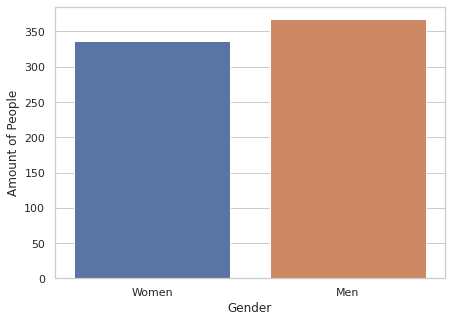

In [22]:
# How many men versus how many women are in this study?
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x='gender',
              data=df)
ax.set_ylabel("Amount of People")
ax.set_xlabel("Gender")
ax.set_xticklabels(["Women", "Men"])

plt.show()

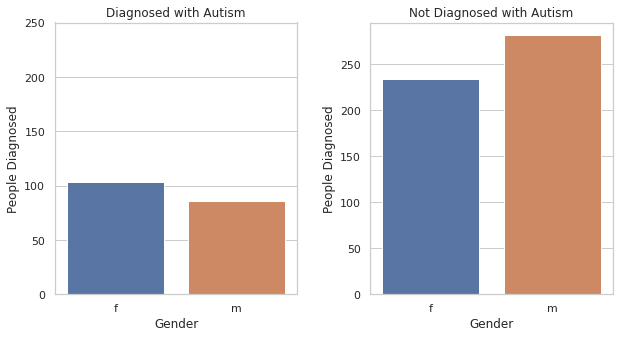

In [23]:
# Two subplots showing amount of women versus men diagnosed as having autism or not having autism.
fig2, axes = plt.subplots(1,2, figsize=(10,5))
plt.subplots_adjust(wspace=0.3)

yes_count = sns.countplot(x='gender',
            data=app_diag_yes,
            order=['f','m'],
            ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('People Diagnosed')
axes[0].set_title("Diagnosed with Autism")
axes[0].set(ylim=(0,250))

no_count = sns.countplot(x='gender',
            data=app_diag_no,
            ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('People Diagnosed')
axes[1].set_title("Not Diagnosed with Autism")

plt.show()

In [24]:
# Spread of test scores for men and women
women = df[df['gender'] == 'f']
men = df[df['gender'] == 'm']
women.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,unknown,no,no,Egypt,no,2,18 and more,unknown,NO
6,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,United States,no,2,18 and more,Self,NO
11,0,1,0,1,1,1,1,0,0,1,...,f,Middle Eastern,no,no,Burundi,no,6,18 and more,Parent,NO


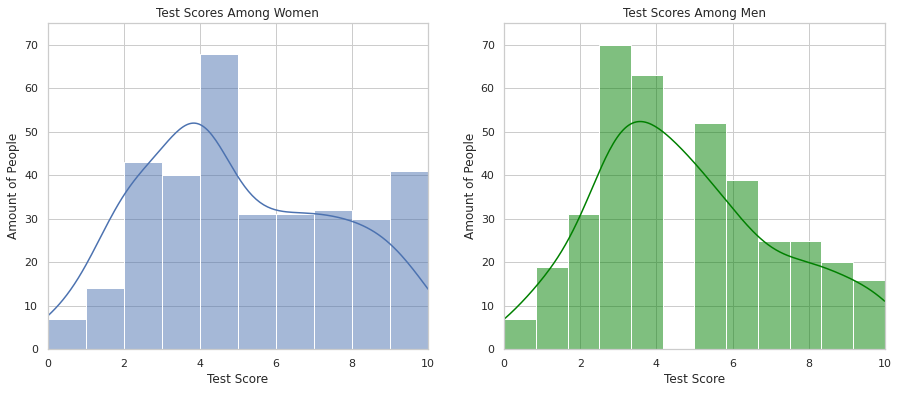

In [25]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
sns.histplot(x='result',
             data=women,
             kde=True,
             ax=axes[0])
axes[0].set_xlim(0,10)
axes[0].set_ylim(0,75)
axes[0].set_xlabel('Test Score')
axes[0].set_ylabel('Amount of People')
axes[0].set_title('Test Scores Among Women')

sns.histplot(x='result',
             color='green',
             data=men,
             kde=True,
             ax=axes[1])
axes[1].set_xlim(0,10)
axes[1].set_ylim(0,75)
axes[1].set_xlabel('Test Score')
axes[1].set_ylabel('Amount of People')
axes[1].set_title('Test Scores Among Men')
plt.show()

In [26]:
# Prediagnosis among women versus men
# Filter the dataframe
prediag_df = df[df['austim'] == 'yes']
prediag_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,18 and more,Health care professional,YES
15,1,1,0,1,1,0,0,1,0,1,...,m,Middle Eastern,no,yes,New Zealand,no,6,18 and more,Parent,NO


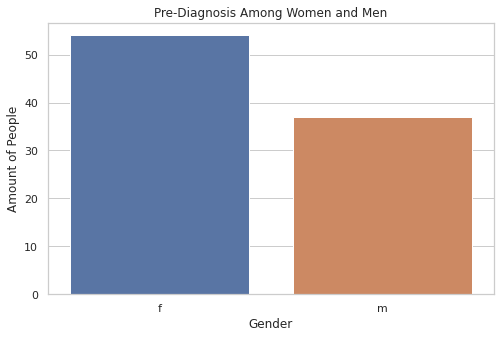

In [27]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="gender",
              data=prediag_df,
              order=['f', 'm'])
plt.xlabel("Gender")
plt.ylabel("Amount of People")
plt.title("Pre-Diagnosis Among Women and Men")
plt.show()

In [28]:
df[df['gender'] == 'f'].count() #337
df[df['gender'] == 'm'].count() #367

367 - 337

30

### Summary
- Men outnumber women in this study by 30.
- Women had a median test score between 4 and 6.
- Men had a median test score between 3 and 4.
- More people are not diagnosed with autism via this app.
- More women were diagnosed via the app than men due to their higher scores.
- More women came to the app with a pre-diagnosis than men 

## How many BIPOC (black, indigenous, people of color) were and weren't diagnosed compared to other ethnicities?

In [29]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,unknown,no,no,Egypt,no,2,18 and more,unknown,NO


In [30]:
# Defining BIPOC.
pd.value_counts(df['ethnicity'])

# BIPOC will be defined as these ethnities: Asian, Middle Eastern, Black, South Asian, Latino, Hispanic, Pasifika,
    # Turkish, Others, others. 

In [31]:
# Creating BIPOC and White-European dataframes.
BIPOC_aut = df[(df['ethnicity'] != 'White-European') & (df['ethnicity'] != 'unknown')]

white_aut = df[(df['ethnicity'] == 'White-European') & (df['ethnicity'] != 'unknown')]

BIPOC_aut.count() #376
white_aut.count() #233

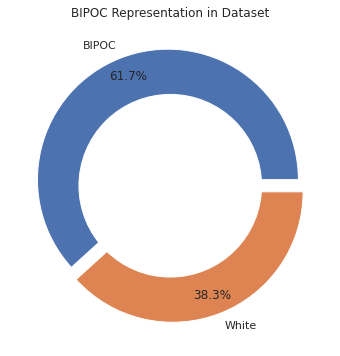

In [32]:
# How many BIPOC versus non-BIPOC were in this study?
# 376 BIPOC versus 233 white.
# Create a piechart that shows the racial proportions.
counts = [376, 233]
explode = (0.05, 0.05)

fig = plt.subplots(figsize=(7,6))

plt.pie(counts, 
        labels=['BIPOC', 'White'],
        autopct='%1.1f%%',
        pctdistance=0.85,
        explode=explode)

# Draw the circle.
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Title
plt.title("BIPOC Representation in Dataset")

plt.show()

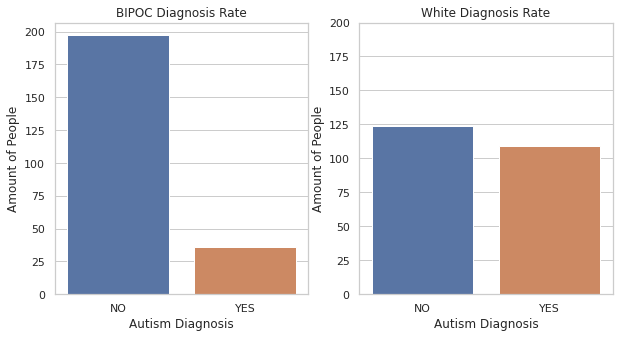

In [33]:
# Two subplots showing BIPOC compared to white autism diagnoises.

fig3,axes = plt.subplots(1,2, figsize=(10,5))

sns.countplot(x='Class/ASD',
              data=BIPOC_aut[:233],
              ax=axes[0])
axes[0].set_title("BIPOC Diagnosis Rate")
axes[0].set_xlabel("Autism Diagnosis")
axes[0].set_ylabel("Amount of People")

sns.countplot(x='Class/ASD',
              data=white_aut,
              ax=axes[1])
axes[1].set_title("White Diagnosis Rate")
axes[1].set_xlabel("Autism Diagnosis")
axes[1].set_ylabel("Amount of People")
axes[1].set(ylim=(0,200))

plt.show()

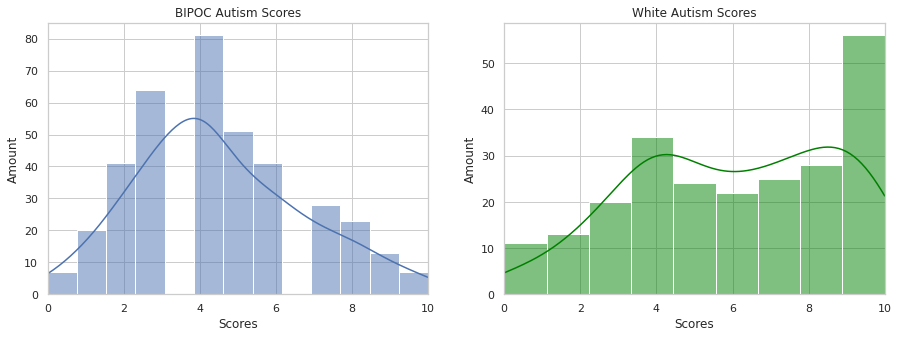

In [34]:
# BIPOC test scores versus white test scores.
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.histplot(x='result',
             data=BIPOC_aut,
             ax=axes[0],
             kde=True)
axes[0].set_title("BIPOC Autism Scores")
axes[0].set_xlabel("Scores")
axes[0].set_ylabel("Amount")
axes[0].set_xlim(0,10)

sns.histplot(x='result',
             color='green',
             data=white_aut,
             ax=axes[1],
             kde=True)
axes[1].set_title("White Autism Scores")
axes[1].set_xlabel("Scores")
axes[1].set_ylabel("Amount")
axes[1].set_xlim(0,10)

plt.show()

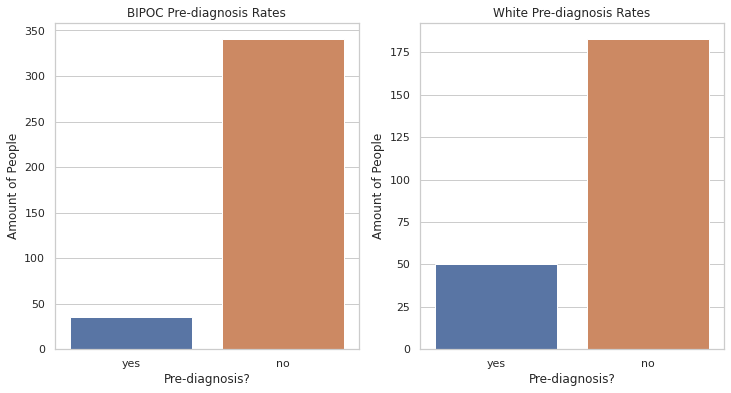

In [35]:
# Pre-diagnosis rates among BIPOC and white participants
fig, axes = plt.subplots(1,2,figsize=(12, 6))
sns.countplot(x='austim',
              data=BIPOC_aut,
              ax=axes[0])
axes[0].set_title("BIPOC Pre-diagnosis Rates")
axes[0].set_ylabel("Amount of People")
axes[0].set_xlabel("Pre-diagnosis?")

sns.countplot(x='austim',
              data=white_aut,
              ax=axes[1],
              order=['yes', 'no'])
axes[1].set_title("White Pre-diagnosis Rates")
axes[1].set_ylabel("Amount of People")
axes[1].set_xlabel("Pre-diagnosis?")

plt.show()

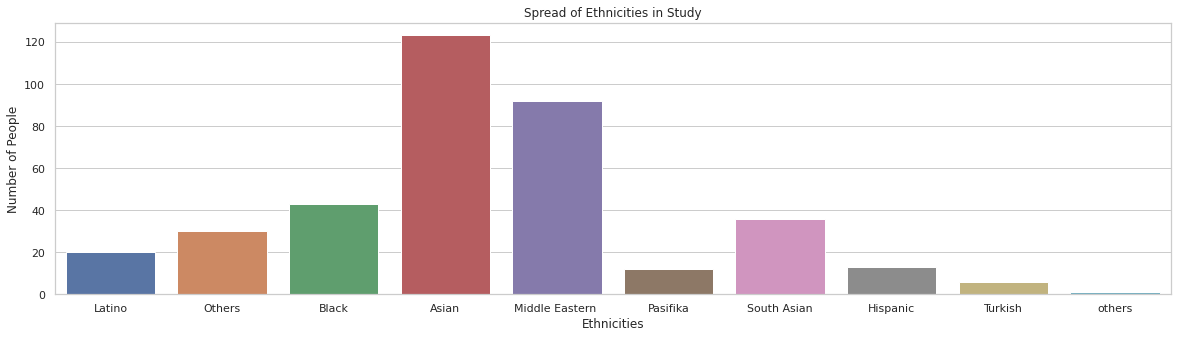

In [36]:
# Plot showing diagnosis rate amount different BIPOC ethnicities
fig,ax = plt.subplots(figsize=(20,5))

sns.countplot(x='ethnicity',
              data=BIPOC_aut)
plt.xlabel("Ethnicities")
plt.ylabel("Number of People")
plt.title("Spread of Ethnicities in Study")

plt.show()

### Summary
- 61.7% of the sample size identified as BIPOC.
- Those that identify as BIPOC in the study had a higher chance of the app not diagnosing them with autism.
- Those that identify as white or White-European were middling in their autism diagnosis, but with a slightly higher chance of not being diagnosed with autism.
- There is not an even spread of BIPOC ethnicites. Asian and Middle Eastern dominate the category with Pasifika coming in last.
- Most BIPOC participants had test scores of 4, while white participants had higher scores.  
- Both categories show low rates of prediagnosis, but among the BIPOC participants the rates are significantly higher.

## How many people aged 45 and over were able to secure a diagnosis?

In [37]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,unknown,no,no,Egypt,no,2,18 and more,unknown,NO


In [38]:
df['age'] = df['age'].astype('int')

In [39]:
df[df['age'] >= 45] # 60 results

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,New Zealand,no,5,18 and more,Parent,NO
28,0,0,0,0,0,0,0,1,0,0,...,m,Black,no,no,New Zealand,no,1,18 and more,Self,NO
32,1,1,0,0,0,0,1,0,0,1,...,f,Others,no,no,New Zealand,no,4,18 and more,Self,NO
35,0,0,1,0,0,0,0,0,0,0,...,m,White-European,no,no,New Zealand,no,1,18 and more,Self,NO
36,0,1,1,0,1,0,0,1,1,1,...,m,Middle Eastern,no,no,United Arab Emirates,no,6,18 and more,Self,NO
38,1,0,0,1,1,1,1,0,1,1,...,f,White-European,no,no,New Zealand,no,7,18 and more,Self,YES
45,1,0,1,1,1,1,0,1,1,0,...,f,White-European,no,no,New Zealand,no,7,18 and more,Relative,YES
48,0,1,1,0,0,1,0,0,0,0,...,m,White-European,no,no,New Zealand,no,3,18 and more,Relative,NO
52,1,0,0,0,0,0,0,0,0,0,...,f,Pasifika,no,no,New Zealand,no,1,18 and more,Self,NO
54,1,1,1,1,1,1,1,1,1,1,...,m,White-European,no,no,United States,no,10,18 and more,Self,YES


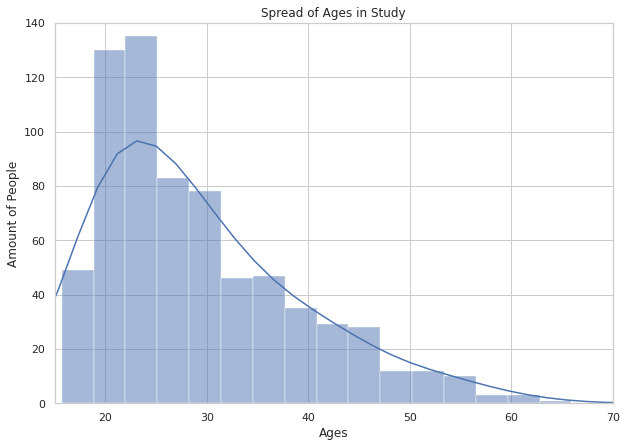

In [40]:
# Show the spread of ages
fig, ax = plt.subplots(figsize=(10,7))
sns.histplot(x='age',
             data=df,
             kde=True)
plt.xlim(15,70)
plt.ylim(0, 140)
plt.xlabel('Ages')
plt.ylabel('Amount of People')
plt.title('Spread of Ages in Study')

plt.show()

In [41]:
# Show spread of final test results versus age.
df['result'] = df['result'].astype('int')

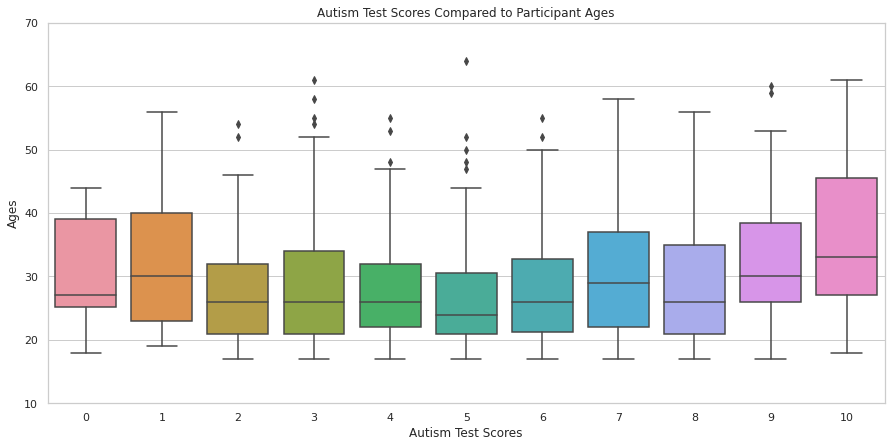

In [42]:
# Plot test results against age
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x='result',
                y='age',
                data=df)
plt.ylim(10, 70)
plt.xlabel('Autism Test Scores')
plt.ylabel('Ages')
plt.title('Autism Test Scores Compared to Participant Ages')
plt.show()

In [43]:
# Create a dataframe with participants aged 45 and older.
forty_five_df = df[df['age'] >= 45]
forty_five_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,New Zealand,no,5,18 and more,Parent,NO
28,0,0,0,0,0,0,0,1,0,0,...,m,Black,no,no,New Zealand,no,1,18 and more,Self,NO
32,1,1,0,0,0,0,1,0,0,1,...,f,Others,no,no,New Zealand,no,4,18 and more,Self,NO
35,0,0,1,0,0,0,0,0,0,0,...,m,White-European,no,no,New Zealand,no,1,18 and more,Self,NO
36,0,1,1,0,1,0,0,1,1,1,...,m,Middle Eastern,no,no,United Arab Emirates,no,6,18 and more,Self,NO


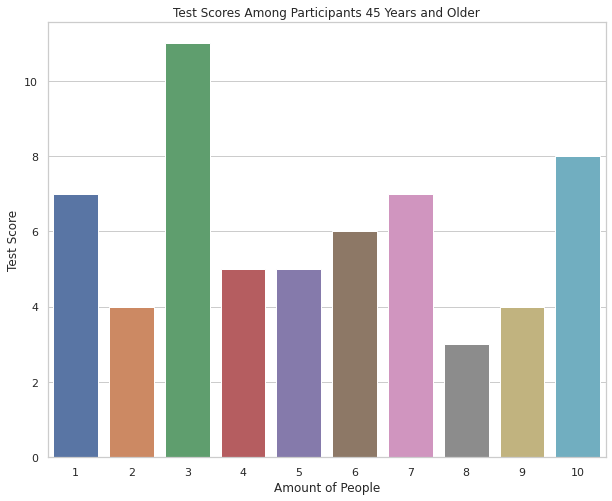

In [44]:
# How many people over 45 obtain a score of 7 or higher?
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='result',
            data=forty_five_df)
plt.xlabel("Amount of People")
plt.ylabel('Test Score')
plt.title('Test Scores Among Participants 45 Years and Older')
plt.show()

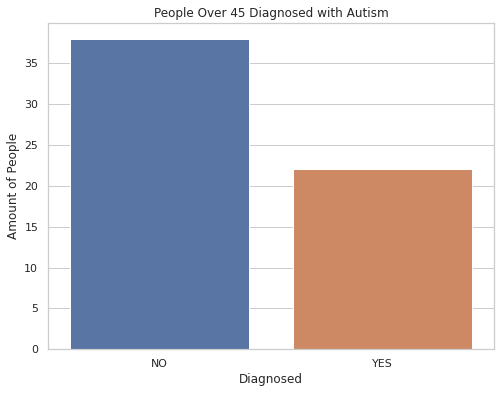

In [45]:
# How many people in the new dataframe were diagnosed with autism by the app?
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Class/ASD',
              data=forty_five_df)
plt.xlabel('Diagnosed')
plt.ylabel('Amount of People')
plt.title('People Over 45 Diagnosed with Autism')
plt.show()

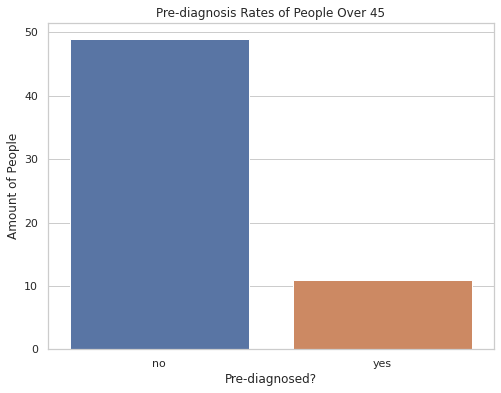

In [46]:
# Where they diagnosed previously?
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='austim',
              data=forty_five_df)
plt.xlabel("Pre-diagnosed?")
plt.ylabel("Amount of People")
plt.title("Pre-diagnosis Rates of People Over 45")
plt.show()

### Summary
- A bulk of the participants in this study are between the ages of 20 and 30 years old.
- Participants aged 45 and older mainly obtained scores of 1, 7, 10 and 3. 
- Participants 45 years and older in this study are more likely to be diagnosed as not having autism by this app despite having high autism test scores. 
- Most older participants came to this app without a prior diagnosis.

# Summary and Closing

Through ten questions and a collection of features, participants in this app were diagnosed as either having autism or not having autism. Through my exploration of this dataset, I have found that three groups of people are more apt to be diagnosed by this app: women, white identifying people, and those within the 20 to 30 age group. Despite the app gathering data on if an individual has been diagnosed with autism before, this feature was not taken into account when giving individuals their diagnoses.

BIPOC and individuals beyond the 20 to 30 age range, despite obtaining scores within the 7 to 10 "passing" range, often do not obtain a diagnosis from this app. This could indicate built-in bias if the app includes an algorithm that makes the final decision on if an individual is autistic or not. Otherwise, it may behoove screeners to undergo diversity training so that individuals may come to understand how autism shows itself in individuals that are not white.  